#  Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
# Predict - CGPA of a student based on different grades in four years.


In [1]:
# import basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
grades =pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
grades.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


#  Use sample technique to check random details to get idea what type of data

In [3]:
grades.sample(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
342,CS-97343,B-,A-,A+,B+,A-,B,B+,A,A-,...,A+,B,A,B,A,A-,B,B,NaN,3.184
198,CS-97199,C,B,A-,D+,C+,A-,C-,D,C-,...,C,D+,D+,D,B-,A-,D+,D,B-,1.992
442,CS-97443,B+,C,A,C+,A-,B+,A,B+,A,...,A,B+,A,C-,C+,B,A,A-,B,3.179
338,CS-97339,A-,A,B,B+,A,B-,B,A,B,...,A+,B+,A-,B+,NaN,A-,A-,B+,B+,3.408
548,CS-97549,A,A,A,A,C+,A,B+,C,B+,...,B,B,B,B,B-,A-,A,C+,B,3.182
53,CS-97054,B-,B-,C,B-,C-,A-,C+,B-,A-,...,D+,C-,D+,C,A-,A,B-,B,A-,2.793
427,CS-97428,A+,A,A+,A,A+,A,A,A,A,...,A+,A+,A,A+,A+,A-,A,A+,A,3.985
258,CS-97259,A-,C+,A-,A,B+,A+,A-,A-,A-,...,A-,A,A-,B-,A-,A,B,A-,A-,3.479
212,CS-97213,B+,A-,B+,A-,B+,A-,C+,B,C,...,C-,C+,A-,C+,A-,A-,B-,B-,A-,2.717
469,CS-97470,A,A-,A+,A,A,A+,B,A-,B+,...,A+,A-,A,B+,A,B+,A,A,A-,3.714


# 
use sample techniques to know there is null values present in the dataset

In [4]:
grades.duplicated().sum()

0

#  There is no dupliacate values present in the dataset

In [5]:
grades.shape

(571, 43)

#  There is 571 Rows and 43 colums present in the dataset

In [6]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

#  
The target variable cgpa is float datatype so there is linear regression promble

Remaining column is object datatype

In [7]:
for i in grades.columns:
    print (grades[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0      CS-97001
1      CS-97002
2      CS-97003
3      CS-97004
4      CS-97005
         ...   
566    CS-97567
567    CS-97568
568    CS-97569
569    CS-97570
570    CS-97571
Name: Seat No., Length: 571, dtype: object>
<bound method IndexOpsMixin.value_counts of 0      B-
1       A
2       A
3       D
4      A-
       ..
566     B
567    A+
568     B
569     A
570     C
Name: PH-121, Length: 571, dtype: object>
<bound method IndexOpsMixin.value_counts of 0      D+
1       D
2       B
3      C+
4      A-
       ..
566     A
567     A
568     A
569    B+
570     D
Name: HS-101, Length: 571, dtype: object>
<bound method IndexOpsMixin.value_counts of 0      C-
1      D+
2       A
3      D+
4      A-
       ..
566     A
567     A
568    A-
569     D
570     D
Name: CY-105, Length: 571, dtype: object>
<bound method IndexOpsMixin.value_counts of 0       C
1       D
2      B-
3       D
4      B+
       ..
566    A-
567     A
568    B+
569     A
570 

In [8]:
grades['Seat No.'].nunique()

571

#  seat no is unique value is 571 rows and its just a number to every student so we drop this column

In [9]:
grades.drop(columns='Seat No.',axis=1,inplace=True)

In [10]:
grades.isna().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

#  Encoding and Imputing process

In [11]:
categorial_data=[]
for i in grades.dtypes.index:
    if grades.dtypes[i]=='object':
        categorial_data.append(i)
numerical_data=[]
for i in grades.dtypes.index:
    if grades.dtypes[i] !='object':
        numerical_data.append(i)

In [12]:
categorial_data

['PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412']

In [13]:
numerical_data

['CGPA']

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
grades = pd.DataFrame(imputer.fit_transform(grades), columns=grades.columns)

#  we use imputing mode method technique to fill null values 
# and for encoding we use LabelEncoder techniques

In [15]:
grades.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [16]:
grades.isna().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

#  There is no null values present in data

In [17]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PH-121     571 non-null    object
 1   HS-101     571 non-null    object
 2   CY-105     571 non-null    object
 3   HS-105/12  571 non-null    object
 4   MT-111     571 non-null    object
 5   CS-105     571 non-null    object
 6   CS-106     571 non-null    object
 7   EL-102     571 non-null    object
 8   EE-119     571 non-null    object
 9   ME-107     571 non-null    object
 10  CS-107     571 non-null    object
 11  HS-205/20  571 non-null    object
 12  MT-222     571 non-null    object
 13  EE-222     571 non-null    object
 14  MT-224     571 non-null    object
 15  CS-210     571 non-null    object
 16  CS-211     571 non-null    object
 17  CS-203     571 non-null    object
 18  CS-214     571 non-null    object
 19  EE-217     571 non-null    object
 20  CS-212     571 non-null    objec

#  To use encoding techniques all column is int dtype but the cgpa dtype is changed to object we have to convert float dtype

In [18]:
grades['CGPA']=grades['CGPA'].astype(float)
print(grades['CGPA'].dtype)

float64


In [19]:
grades.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


#  As per statistics information we cannot observed cause all columns is categorical data

#  All are the object datatype so only showing target variable statistics

#  EDA

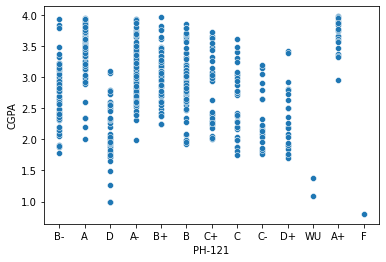

In [20]:
sns.scatterplot(data=grades,x='PH-121',y='CGPA')
plt.show()

#   
PH-121 SUBJECT HAS GOT  D RATING HAS LOW CGPA AND A+  RATING HAS HIGH CHANCES TO HIGH CGPA

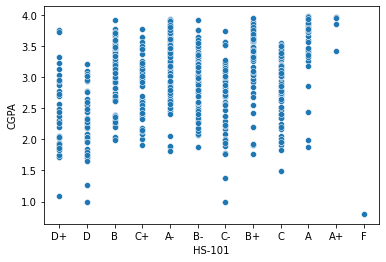

In [21]:
sns.scatterplot(data=grades,x='HS-101',y='CGPA')
plt.show()

# 
HS-101 SUBJECT HAS GOT D AND C- RATING HAS LOW CGPA AND A+ HAS HIGH CGPA

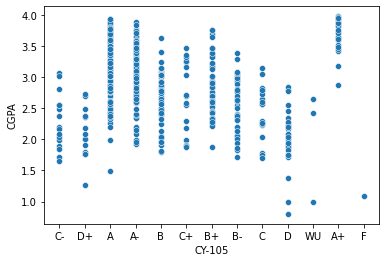

In [22]:
sns.scatterplot(data=grades,x='CY-105',y='CGPA')
plt.show()

# 
CY-105 SUBJECT HAS GOT D AND F RATING HAS LOW CGPA AND A+ HAS HIGH CGPA

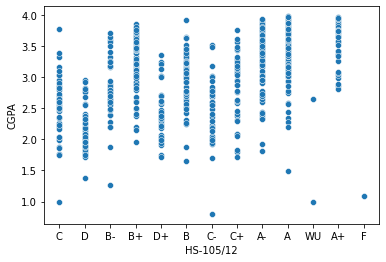

In [23]:
sns.scatterplot(data=grades,x='HS-105/12',y='CGPA')
plt.show()

# 
HS-105/12 SUBJECT HAS GOT D AND F RATING HAS LOW CGPA AND A+ HAS HIGH CGPA

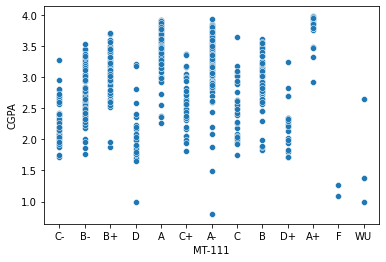

In [24]:
sns.scatterplot(data=grades,x='MT-111',y='CGPA')
plt.show()

#  
MT-111  SUBJECT HAS GOT D , F,WU RATING HAS LOW CGPA AND A HAS HIGH CGPA

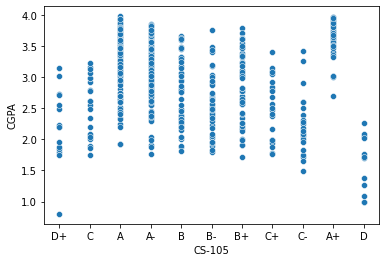

In [25]:
sns.scatterplot(data=grades,x='CS-105',y='CGPA')
plt.show()

#  
MT-111 SUBJECT HAS GOT D  RATING HAS LOW CGPA AND A ,A+ AND A-HAS HIGH CGPA

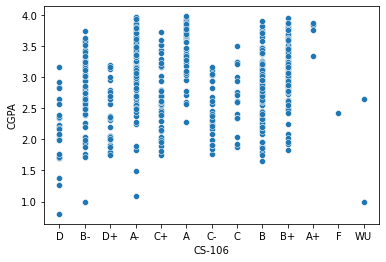

In [26]:
sns.scatterplot(data=grades,x='CS-106',y='CGPA')
plt.show()

#  
MT-111 SUBJECT HAS GOT WU RATING HAS LOW CGPA AND A ,A+ AND A-HAS HIGH CGPA

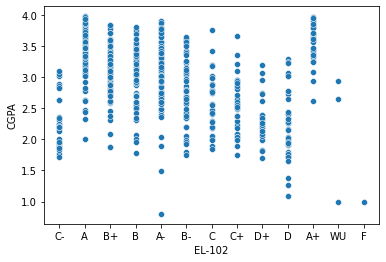

In [27]:
sns.scatterplot(data=grades,x='EL-102',y='CGPA')
plt.show()

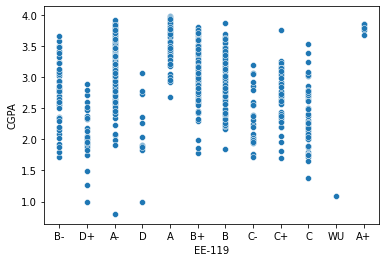

In [28]:
sns.scatterplot(data=grades,x='EE-119',y='CGPA')
plt.show()

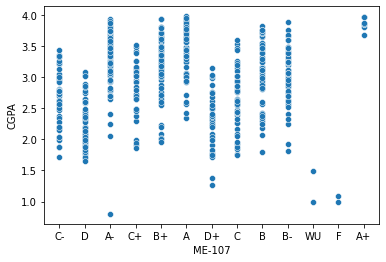

In [29]:
sns.scatterplot(data=grades,x='ME-107',y='CGPA')
plt.show()

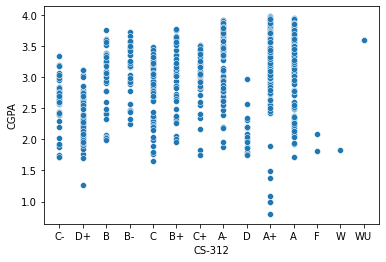

In [30]:
sns.scatterplot(data=grades,x='CS-312',y='CGPA')
plt.show()

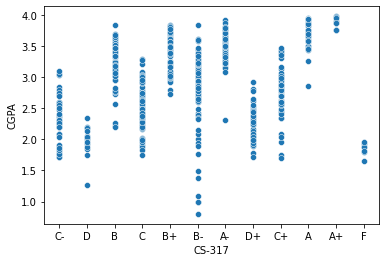

In [31]:
sns.scatterplot(data=grades,x='CS-317',y='CGPA')
plt.show()

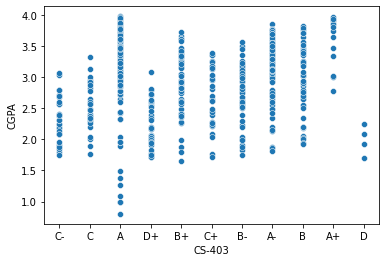

In [32]:
sns.scatterplot(data=grades,x='CS-403',y='CGPA')
plt.show()

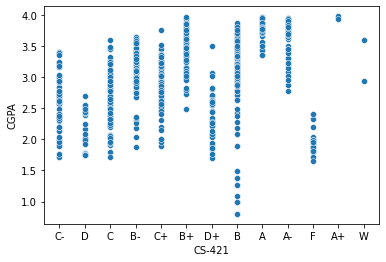

In [33]:
sns.scatterplot(data=grades,x='CS-421',y='CGPA')
plt.show()

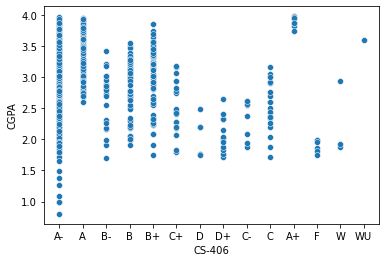

In [34]:
sns.scatterplot(data=grades,x='CS-406',y='CGPA')
plt.show()

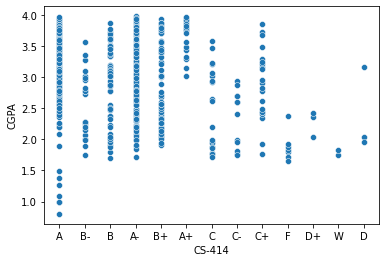

In [35]:
sns.scatterplot(data=grades,x='CS-414',y='CGPA')
plt.show()

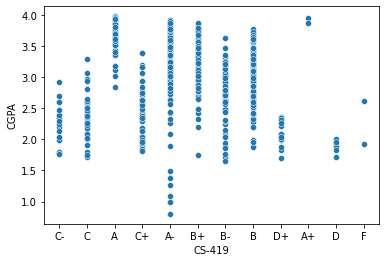

In [36]:
sns.scatterplot(data=grades,x='CS-419',y='CGPA')
plt.show()

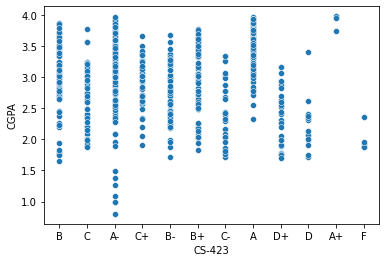

In [37]:
sns.scatterplot(data=grades,x='CS-423',y='CGPA')
plt.show()

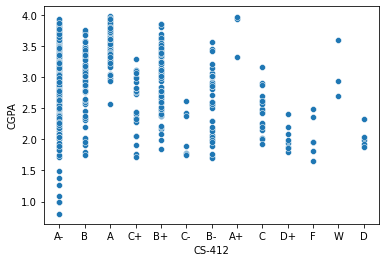

In [38]:
sns.scatterplot(data=grades,x='CS-412',y='CGPA')
plt.show()

#   ACCORDING TO ALL COLUMN OBSERVATION D , WA AND  HAS LOW CGPA AND A, A+ HAS HIGH CGPA

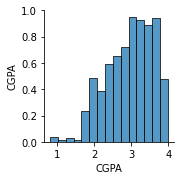

In [39]:
sns.pairplot(grades)

#  CGPA is normally distrubted like this

<AxesSubplot:>

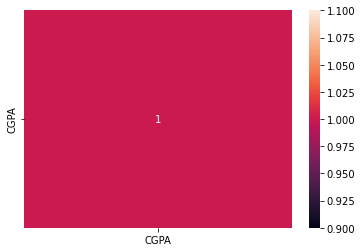

In [40]:
sns.heatmap(grades.corr(),annot=True,)

#  All columns is categorical so  we cannot find any relation  And vif value or any statistics information so we build this model

#  encoding process

In [41]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorial_data:
    
     grades[column] = label_encoder.fit_transform(grades[column])

In [42]:
grades.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448


In [45]:
x= grades.drop('CGPA',axis=1)
y=grades['CGPA']

In [46]:
# import libraryies
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [47]:
maxAccu = 0
maxRs = 0

for i in range(1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    acc = r2_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 0.9643494726169242 at random_state 72


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [50]:
LR= LinearRegression()
LR.fit(x_train,y_train)
pred_LR= LR.predict(x_test)
pred_train= LR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.9643494726169242
R2_score on training data:  91.39022616556755
MEAN ABSOLUTE ERROR : 0.08938340774408551
MEAN SQUARED ERROR : 0.013741931476875207
ROOT MEAN SQUARED ERROR : 0.1172259846487766


In [51]:
GB= GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred_GB= GB.predict(x_test)
pred_train= GB.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_GB) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_GB))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_GB))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_GB)))

R2_score :  0.9663584308841972
R2_score on training data:  99.53002375042729
MEAN ABSOLUTE ERROR : 0.08347149897365076
MEAN SQUARED ERROR : 0.01296755396060115
ROOT MEAN SQUARED ERROR : 0.11387516832304201


In [52]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR= RFR.predict(x_test)
pred_train= RFR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RFR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RFR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RFR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RFR)))

R2_score :  0.9392509302911252
R2_score on training data:  98.36887304200673
MEAN ABSOLUTE ERROR : 0.11090017441860456
MEAN SQUARED ERROR : 0.02341647135406975
ROOT MEAN SQUARED ERROR : 0.1530244142418776


In [53]:
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR= DTR.predict(x_test)
pred_train= DTR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.9643494726169242
R2_score on training data:  100.0
MEAN ABSOLUTE ERROR : 0.08938340774408551
MEAN SQUARED ERROR : 0.013741931476875207
ROOT MEAN SQUARED ERROR : 0.1172259846487766


In [54]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_knn) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_knn))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_knn))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_knn)))

R2_score :  0.9678399340351564
R2_score on training data:  91.42712169240713
MEAN ABSOLUTE ERROR : 0.08414302325581392
MEAN SQUARED ERROR : 0.012396490465116273
ROOT MEAN SQUARED ERROR : 0.11133952786461901


In [55]:
LA= Lasso()
LA.fit(x_train,y_train)
pred_LA= LA.predict(x_test)
pred_train= LA.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LA) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LA))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LA))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LA)))

R2_score :  0.350609991970284
R2_score on training data:  33.484914041131695
MEAN ABSOLUTE ERROR : 0.4242155056363917
MEAN SQUARED ERROR : 0.2503153150084445
ROOT MEAN SQUARED ERROR : 0.50031521564754


In [56]:
RI= Ridge()
RI.fit(x_train,y_train)
pred_RI= RI.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RI) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RI))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RI))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RI)))

R2_score :  0.9643771003828862
R2_score on training data:  91.42712169240713
MEAN ABSOLUTE ERROR : 0.08935085255469434
MEAN SQUARED ERROR : 0.013731282016836958
ROOT MEAN SQUARED ERROR : 0.11718055306592881


#  CROSS VALIDATION SCORE

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
print('LinearRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', (r2_score(y_test,pred_LR)- score.mean()))

LinearRegression 


[0.8927601  0.93427094 0.90082619 0.94061762 0.84878197]
0.9034513625626616
Difference between Accuracy score  and cross validation score is -  0.0608981100542626


In [60]:
print('GradientBoostingRegressor ')
print('\n')
score=cross_val_score(GB, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_GB)- score.mean())

GradientBoostingRegressor 


[0.92060606 0.95755995 0.95596656 0.94564187 0.87428369]
0.9308116262064432
Difference between Accuracy score  and cross validation score is -  0.03554680467775395


In [61]:
print('RandomForestRegressor ')
print('\n')
score=cross_val_score(RFR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RFR)- score.mean())

RandomForestRegressor 


[0.91098471 0.92460874 0.93596554 0.91321975 0.84383909]
0.905723565691018
Difference between Accuracy score  and cross validation score is -  0.03352736460010719


In [62]:
print('DecisionTreeRegressor ')
print('\n')
score=cross_val_score(DTR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_DTR)- score.mean())

DecisionTreeRegressor 


[0.76422058 0.8017454  0.87087732 0.72205303 0.72467256]
0.7767137784719912
Difference between Accuracy score  and cross validation score is -  0.09194574794742727


In [63]:
print('KNN ')
print('\n')
score=cross_val_score(knn, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_knn)- score.mean())

KNN 


[0.88704165 0.93105804 0.86498494 0.95195617 0.81245731]
0.8894996210901137
Difference between Accuracy score  and cross validation score is -  0.07834031294504273


In [64]:
print('Lasso ')
print('\n')
score=cross_val_score(LA, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_LA)- score.mean())

Lasso 


[0.34542541 0.3341994  0.3340023  0.37377257 0.28984562]
0.33544905937176195
Difference between Accuracy score  and cross validation score is -  0.015160932598522026


In [65]:
print('Ridge ')
print('\n')
score=cross_val_score(RI, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RI)- score.mean())

Ridge 


[0.89277522 0.93427636 0.90085156 0.94066429 0.84879596]
0.9034726777742446
Difference between Accuracy score  and cross validation score is -  0.060904422608641595


#  CROSS VALIDATION SCORE

In [67]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'loss': ['ls', 'lad', 'huber', 'quantile'],
          'learning_rate': [0.1, 0.01, 0.001],
          'n_estimators': [100, 200, 500],
          'subsample': [0.8, 1.0],
          'criterion': ['friedman_mse', 'mse', 'mae'],
          'min_samples_split': [2, 4, 8],
          'min_samples_leaf': [1, 2, 4],
          'max_depth': [3, 5, 8],
          'min_impurity_decrease': [0.0, 0.1, 0.2],
          'max_features': ['auto', 'sqrt', 'log2'],
          'alpha': [0.9, 0.5, 0.1],
          'max_leaf_nodes': [None, 10, 50],
          'ccp_alpha': [0.0, 0.1, 0.2]}

gdsv = GridSearchCV(GradientBoostingRegressor(), params, cv=5)
gdsv.fit(x_train, y_train)


In [ ]:
params = {'alpha': [1.0, 0.05, 0.4, 2],
          'random_state': [1, 4, 10, 20]}

gdsv = GridSearchCV(GradientBoostingRegressor(), params, cv=5)
gdsv.fit(x_train, y_train)


In [77]:
gdsv.best_params_

{'alpha': 0.05, 'random_state': 1}

In [78]:
Final_model = GradientBoostingRegressor(alpha=0.05, random_state=1)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= r2_score(y_test, pred)
print(acc*100)

96.67154689052437


#  After  cross validation techniques it increase 0.4 per